In [15]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist

In [4]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
        # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    

In [5]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

In [6]:
net.params['W1'].shape

(784, 100)

In [7]:
net.params['b1'].shape

(100,)

In [8]:
net.params['W2'].shape

(100, 10)

In [9]:
net.params['b2'].shape

(10,)

In [10]:
x = np.random.rand(100,784)
y = net.predict(x)

In [14]:
x = np.random.rand(100,784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x, t)

In [13]:
grads['W1'].shape

(784, 100)

In [16]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)




In [78]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 5  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
print(train_size)
batch_size = 10   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
print(iter_per_epoch)

60000
6000.0


In [79]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
        # 1에폭당 정확도 계산
    #if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.11825, 0.117
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10441666666666667, 0.1028
train acc, test acc | 0.10441666666666667, 0.1028


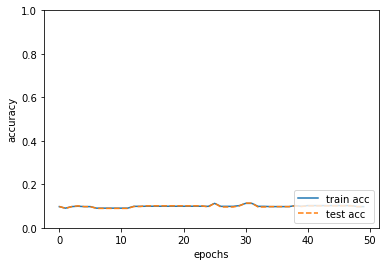

In [76]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [77]:
print(test_acc_list)

[0.0982, 0.0892, 0.0974, 0.1009, 0.0974, 0.0974, 0.0892, 0.0892, 0.0892, 0.0892, 0.0892, 0.0892, 0.098, 0.098, 0.1009, 0.1009, 0.1009, 0.1009, 0.1009, 0.1009, 0.1009, 0.1009, 0.1009, 0.1009, 0.0958, 0.1135, 0.0958, 0.0958, 0.0958, 0.101, 0.1135, 0.1135, 0.0958, 0.0958, 0.0974, 0.0974, 0.0974, 0.0974, 0.101, 0.098, 0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.0974, 0.0974]
